In [1]:
import numpy as np

import PIL
from PIL import Image,ImageOps

import matplotlib.pyplot as plt

**1. Do you really understand the convolution operation?**

In [2]:
def conv(image, kernel):
    
    convolved_image = np.zeros([image.shape[0]-kernel.shape[0]+1,image.shape[1]-kernel.shape[1]+1])
    
    for i in range(convolved_image.shape[0]):
        
        for j in range(convolved_image.shape[1]):
            
            matrix = image[i:i+kernel.shape[0], j:j+kernel.shape[1]]
            
            convolved_image[i, j] = np.sum(np.multiply(matrix, kernel))

    return convolved_image

def get_kernel(name):
    
    if (name == 'Sobel X'):
        return np.array([ [-1, 0, 1],
                          [-2, 0, 2],
                          [-1, 0, 1] ])
    elif (name == 'Sobel Y'):
        return np.array([ [-1,-2,-1],
                          [-0, 0, 0],
                          [ 1, 2, 1] ])
    elif (name == 'Gaussian'):
        return (1/159)*np.array([ [ 2, 4, 5, 4, 2],
                                  [ 4, 9,12, 9, 4],
                                  [ 5,12,15,12, 5],
                                  [ 4, 9,12, 9, 4],
                                  [ 2, 4, 5, 4, 2] ])

**2.Check your implementation**

In [3]:
image = Image.open('Data/lord_einstein.jpg')

image = ImageOps.grayscale(image) #even though it is black and white, it had 3 scales

In [4]:
def disp_image(image,size=8):
    plt.figure(figsize=(size, size))
    plt.imshow(image, cmap='gray')   

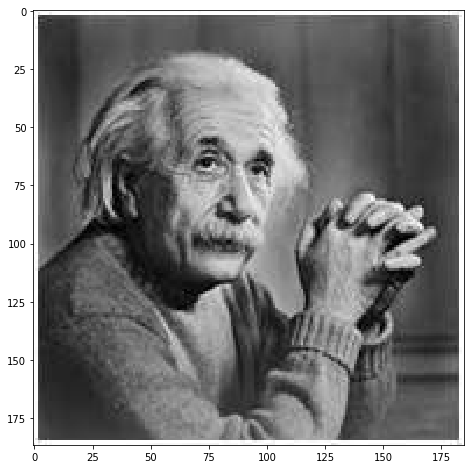

In [5]:
disp_image(image)

In [6]:
image = np.array(image)

In [7]:
smoothened = conv(image, get_kernel('Gaussian'))

In [8]:
sobel_X = conv(smoothened, get_kernel('Sobel X'))
sobel_Y = conv(smoothened, get_kernel('Sobel Y'))

In [9]:
gradient = np.sqrt(np.square(sobel_X)+np.square(sobel_Y))

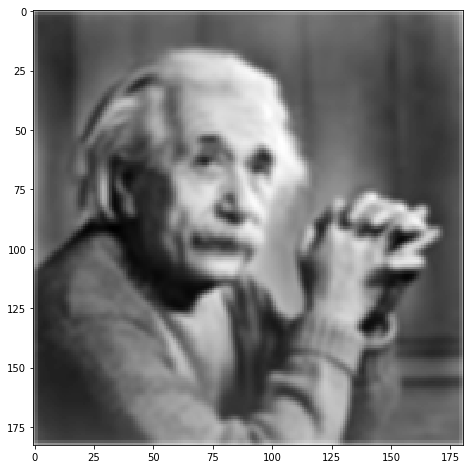

In [10]:
disp_image(smoothened)

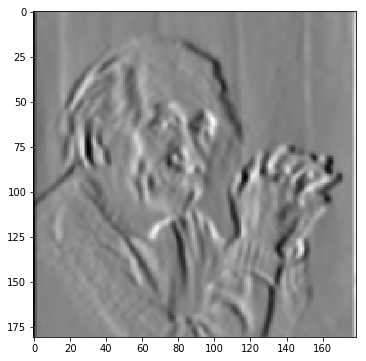

In [11]:
disp_image(sobel_X,6)

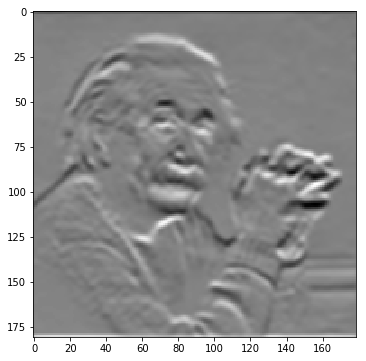

In [12]:
disp_image(sobel_Y,6)

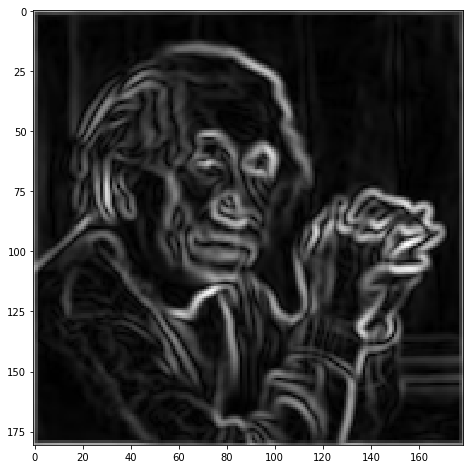

In [13]:
disp_image(gradient)

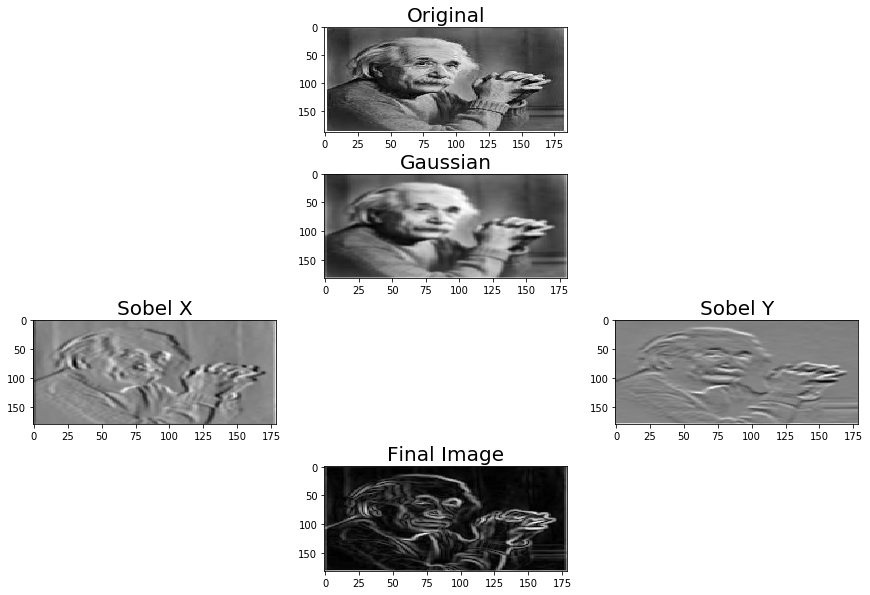

In [14]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(hspace=0.4)

plot1 = plt.subplot2grid((4, 4), (0, 1))
plot2 = plt.subplot2grid((4, 4), (1, 1))
plot3 = plt.subplot2grid((4, 4), (2, 0))
plot4 = plt.subplot2grid((4, 4), (2, 2))
plot5 = plt.subplot2grid((4, 4), (3, 1))

plot1.imshow(image, cmap='gray', aspect='auto')
plot1.set_title('Original',fontsize=20)

plot2.imshow(smoothened, cmap='gray', aspect='auto')
plot2.set_title('Gaussian',fontsize=20)

plot3.imshow(sobel_X, cmap='gray', aspect='auto')
plot3.set_title('Sobel X',fontsize=20)

plot4.imshow(sobel_Y, cmap='gray', aspect='auto')
plot4.set_title('Sobel Y',fontsize=20)

plot5.imshow(gradient, cmap='gray', aspect='auto')
plot5.set_title('Final Image',fontsize=20)

plt.show()